In [217]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import matplotlib.cm as cm

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# The Most important questions to answer

# 1.How does my Data Frame need to be structured for me to have the right X and Y axis?
# 2.How do I build a basic scatter plot?
# 3.How do I add a label to that scatter plot?" "Where would the labels for that scatter plot come from?


# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
mouse_data
clinical_data = pd.read_csv(clinical_trial_data_to_load)
clinical_data

# Combine the data into a single dataset
combined_data = pd.merge(mouse_data, clinical_data, on = "Mouse ID")


# Display the data table for preview

combined_data.head(10)


Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2
5     f234  Stelasyn         25           52.178602                 2
6     f234  Stelasyn         30           56.873817                 2
7     f234  Stelasyn         35           57.748758                 2
8     x402  Stelasyn          0           45.000000                 0
9     x402  Stelasyn          5           46.327570                 1

## Tumor Response to Treatment

In [218]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

grouped_dt = combined_data.groupby(["Drug", "Timepoint"])

mean_tumor = grouped_dt["Tumor Volume (mm3)"].mean()

mean_tumor_df =  pd.DataFrame(mean_tumor)

mean_tumor_df.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [219]:
mean_tumor_volume_df = pd.DataFrame(mean_tumor_df["Tumor Volume (mm3)"])

#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = mean_tumor_volume_df.sem()
se_df = pd.DataFrame(standard_error)
se_df

mtv_df = mean_tumor_volume_df.reset_index()

mtv_df.set_index(["Timepoint"], inplace = True) 
#mtv_df.set_index(["Timepoint"], inplace = True, append = True, drop = True) 

mtv_df.head()

Drug  Tumor Volume (mm3)
Timepoint                               
0          Capomulin           45.000000
5          Capomulin           44.266086
10         Capomulin           43.084291
15         Capomulin           42.064317
20         Capomulin           40.716325

In [242]:
# Minor Data Munging to Re-Format the Data Frames

Pivot = mtv_df.pivot(columns= "Drug", values = "Tumor Volume (mm3)")
Pivot_df


Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334  
25         55.504138  38.974300  56.166123  55.432935  
30         58.196374  38.703137  59.826738  57.713531  
35         60.350199  37.451996  62.440699  60.089372  
40         63.045537  36.574081  65.356386  62.916692  
45         66.258529  34.955595  68.438310  65.960888

['Stelasyn' 'Propriva' 'Naftisol' 'Ketapril' 'Capomulin' 'Infubinol'
 'Ceftamin' 'Zoniferol' 'Ramicane' 'Placebo']


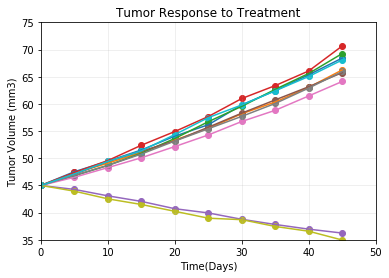

In [273]:
Timepoint = list(Pivot_df.index.values)

drug_list =  combined_data["Drug"].unique()

print(drug_list) # <----- order in which the drugs appear

#color_list = iter(cm.rainbow(np.linspace(0, 1, len(drug_list))))
 
for i in drug_list:
    y_axis1 = Pivot_df[i]
    x_axis1 = Timepoint
    Scatterplot = plt.scatter(x_axis1, y_axis1, marker="o")
    Lines = plt.plot(x_axis1, y_axis1)


x_limit = 50
plt.ylim(35, 75)
plt.xlim(0, x_limit)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(alpha= .25)

#plt.legend(handles=, loc="best")
#plt.legend()

#Add legand with colors manually <---------------

plt.show()

In [259]:

# Generate the Plot (with Error Bars)

# Save the Figure



In [42]:
# Show the Figure


## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()